<a href="https://colab.research.google.com/github/thelydie/FaceSketchSynthesis/blob/main/Face2Sketch_01_0_DeepAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Autoencoder

In [1]:
from google.colab import drive
drive.mount('/content/drive')
CUHK_IMG_PATH = '/content/drive/Othercomputers/LION-YG7/_SCC413/Labs/cuhk_dataset/'

import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt



Mounted at /content/drive


In [2]:
import os
import cv2
import re
from tqdm import tqdm

def prepare_images(dir_path, target_size, flattened=False ):
  """
  Prepares the data
  """
  # Get all file names and sort them by alphabetical order
  filenames = sorted(os.listdir(dir_path))
  paths = [ os.path.join(dir_path, fn) for fn in filenames]

  data_array = []
  for img_path in tqdm(paths):
    img = cv2.imread(img_path, 1)

    # Convert image into RGB format, bc OpenCV loads images in BGR format
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Resize and normalize
    img = cv2.resize(img, target_size, 3)
    img = img.astype('float32') / 255.0

    # Add to array
    data_array.append(np.asarray(img))

  data_array = np.asarray(data_array)
  #print("Array size before reshaping: ", data_array.shape)

  if flattened:
    data_array = data_array.reshape((len(data_array), np.prod(data_array.shape[1:])))
  else:
    data_array = np.reshape(data_array, (len(data_array), target_size[0], target_size[1], 3))

  return data_array



In [3]:
IMG_SZ = 128
IMG_DIM = (IMG_SZ, IMG_SZ, 3)
IMG_DIM_FLAT = np.prod(IMG_DIM)

# Load the data
face_train = prepare_images(CUHK_IMG_PATH+'CUHK_training_cropped_photos', target_size=(IMG_SZ, IMG_SZ), flattened=True)
sketch_train = prepare_images(CUHK_IMG_PATH+'CUHK_training_cropped_sketches', target_size=(IMG_SZ, IMG_SZ), flattened=True)
face_test = prepare_images(CUHK_IMG_PATH+'CUHK_testing_cropped_photos', target_size=(IMG_SZ, IMG_SZ), flattened=True)
sketch_test = prepare_images(CUHK_IMG_PATH+'CUHK_testing_cropped_sketches', target_size=(IMG_SZ, IMG_SZ), flattened=True)

100%|██████████| 100/100 [00:01<00:00, 93.31it/s]


## Data Visualisation

In [ ]:
def plot_side_by_side(original, reconstructions, n=5, 
                      labels=('Original','Reconstructed'),
                      colors=('green','blue')):
  """
  Plots the predictions below to their original.
  """
  plt.figure(figsize=(2*n, 4))
  for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.title(labels[0],color=colors[0])
    plt.imshow(original[i].reshape(IMG_SZ, IMG_SZ,3))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.title(labels[1], color=colors[1])
    plt.imshow(reconstructions[i].reshape(IMG_SZ, IMG_SZ,3))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  plt.show()


def plot_synthesis(original, predicted, target, n=10, 
                   title='Reconstructions from the AE'):
  """
  Plots the face-to-sketch/sketch-to-face.
  """
  plt.figure(figsize=(2*n, 6))
  plt.title(title, fontsize=15)
  for i in range(n):
    # Display original
    ax = plt.subplot(3, n, i + 1)
    plt.title('Original',color='black')
    plt.imshow(original[i].reshape(IMG_SZ, IMG_SZ,3))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display predictions
    ax = plt.subplot(3, n, i + 1 + n)
    plt.title('Predicted',color='blue')
    plt.imshow(predicted[i].reshape(IMG_SZ, IMG_SZ,3))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display target 
    ax = plt.subplot(3, n, i+1+2*n)
    plt.title('Target',color='green')
    plt.imshow(target[i].reshape(IMG_SZ, IMG_SZ,3))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

  plt.show()

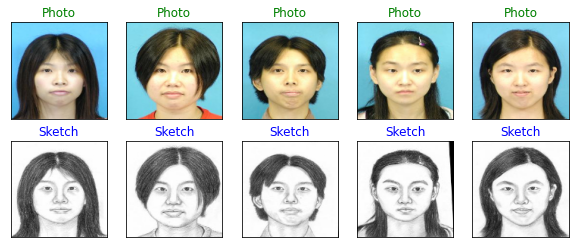

In [ ]:
plot_side_by_side(face_train, sketch_train, labels=('Photo','Sketch'))

# Deep Autoencoder